In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from config import postgresPass as pw

## Happiness Ranks

In [3]:
csv_file = "csv/2022.csv"
happiness_df = pd.read_csv(csv_file)
happiness_df = happiness_df[['Country', 'RANK']]
happiness_df = happiness_df.rename(columns={"RANK": 'happiness_rank', 'Country':'country'})
happiness_df

,country,happiness_rank
0,Finland,1
1,Denmark,2
2,Iceland,3
3,Switzerland,4
4,Netherlands,5
...,...,...
142,Rwanda*,143
143,Zimbabwe,144
144,Lebanon,145
145,Afghanistan,146


In [4]:
country_listA = happiness_df['country']
country_listA

0          Finland
1          Denmark
2          Iceland
3      Switzerland
4      Netherlands
          ...     
142        Rwanda*
143       Zimbabwe
144        Lebanon
145    Afghanistan
146             xx
Name: country, Length: 147, dtype: object

In [5]:
# remove asterisks from countries where these exist

NEW_country_listA = []
for country in country_listA:
    NEW_country_listA.append(country.partition('*')[0])
NEW_country_listA

['Finland',
 'Denmark',
 'Iceland',
 'Switzerland',
 'Netherlands',
 'Luxembourg',
 'Sweden',
 'Norway',
 'Israel',
 'New Zealand',
 'Austria',
 'Australia',
 'Ireland',
 'Germany',
 'Canada',
 'United States',
 'United Kingdom',
 'Czechia',
 'Belgium',
 'France',
 'Bahrain',
 'Slovenia',
 'Costa Rica',
 'United Arab Emirates',
 'Saudi Arabia',
 'Taiwan Province of China',
 'Singapore',
 'Romania',
 'Spain',
 'Uruguay',
 'Italy',
 'Kosovo',
 'Malta',
 'Lithuania',
 'Slovakia',
 'Estonia',
 'Panama',
 'Brazil',
 'Guatemala',
 'Kazakhstan',
 'Cyprus',
 'Latvia',
 'Serbia',
 'Chile',
 'Nicaragua',
 'Mexico',
 'Croatia',
 'Poland',
 'El Salvador',
 'Kuwait',
 'Hungary',
 'Mauritius',
 'Uzbekistan',
 'Japan',
 'Honduras',
 'Portugal',
 'Argentina',
 'Greece',
 'South Korea',
 'Philippines',
 'Thailand',
 'Moldova',
 'Jamaica',
 'Kyrgyzstan',
 'Belarus',
 'Colombia',
 'Bosnia and Herzegovina',
 'Mongolia',
 'Dominican Republic',
 'Malaysia',
 'Bolivia',
 'China',
 'Paraguay',
 'Peru',
 'Mont

In [6]:
happs = happiness_df['happiness_rank']
happiness_df = pd.concat([pd.Series(NEW_country_listA), happs], axis = 1)
happiness_df

,0,happiness_rank
0,Finland,1
1,Denmark,2
2,Iceland,3
3,Switzerland,4
4,Netherlands,5
...,...,...
142,Rwanda,143
143,Zimbabwe,144
144,Lebanon,145
145,Afghanistan,146


In [7]:
# drop the errata
happiness_df = happiness_df.drop(146)
happiness_df=happiness_df.rename(columns = {0: 'country'})
happiness_df

,country,happiness_rank
0,Finland,1
1,Denmark,2
2,Iceland,3
3,Switzerland,4
4,Netherlands,5
...,...,...
141,Botswana,142
142,Rwanda,143
143,Zimbabwe,144
144,Lebanon,145


## Population Density

In [8]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density'
tables = pd.read_html(url)
pop_dens = tables[0]

In [9]:
country_listB = pop_dens['Country (or territory)']['Country (or territory)']
country_listB

0                      Macau * (China)
1                             Monaco *
2                          Singapore *
3                  Hong Kong * (China)
4                    Gibraltar * (BOT)
                    ...               
245         Western Sahara * [note 11]
246                         Mongolia *
247           Falkland Islands * (BOT)
248    Svalbard and Jan Mayen (Norway)
249              Greenland * (Denmark)
Name: Country (or territory), Length: 250, dtype: object

In [10]:
NEW_country_listB = []
for country in country_listB:
    NEW_country_listB.append(country.partition('\u202f*')[0])
NEW_country_listB

['Macau',
 'Monaco',
 'Singapore',
 'Hong Kong',
 'Gibraltar',
 'Bahrain',
 'Malta',
 'Maldives',
 'Bermuda',
 'Sint Maarten',
 'Bangladesh',
 'Guernsey',
 'Vatican City',
 'Jersey',
 'Palestine',
 'Mayotte',
 'Lebanon',
 'Barbados',
 'Saint Martin (France)',
 'Taiwan',
 'Mauritius',
 'Aruba',
 'San Marino',
 'Nauru',
 'South Korea',
 'Saint Barthélemy',
 'Rwanda',
 'Comoros',
 'Netherlands',
 'Israel',
 'Haiti',
 'India',
 'Burundi',
 'Tuvalu',
 'Belgium',
 'Philippines',
 'Curaçao',
 'Puerto Rico',
 'Réunion',
 'Sri Lanka',
 'Japan',
 'Martinique',
 'Guam',
 'El Salvador',
 'Grenada',
 'Marshall Islands',
 'U.S. Virgin Islands',
 'Vietnam',
 'Saint Lucia',
 'American Samoa',
 'Saint Vincent and the Grenadines',
 'United Kingdom',
 'Pakistan',
 'Trinidad and Tobago',
 'Cayman Islands',
 'Jamaica',
 'Kuwait',
 'Liechtenstein',
 'Guadeloupe',
 'Luxembourg',
 'Qatar',
 'Antigua and Barbuda',
 'Germany',
 'Nigeria',
 'Dominican Republic',
 'British Virgin Islands',
 'Seychelles',
 'North 

In [11]:
km2pd = pop_dens['Density']['/km2']
km2pd

0      21055.00
1      19341.00
2       8041.00
3       6677.00
4       5620.00
         ...   
245        2.00
246        2.00
247        0.30
248        0.04
249        0.03
Name: /km2, Length: 250, dtype: float64

In [12]:
popdensDF = pd.concat([pd.Series(NEW_country_listB), km2pd], axis = 1)
popdensDF=popdensDF.rename(columns ={"/km2": "p_dense", 0: 'country'})
popdensDF

,country,p_dense
0,Macau,21055.00
1,Monaco,19341.00
2,Singapore,8041.00
3,Hong Kong,6677.00
4,Gibraltar,5620.00
...,...,...
245,Western Sahara,2.00
246,Mongolia,2.00
247,Falkland Islands,0.30
248,Svalbard and Jan Mayen (Norway),0.04


In [13]:
popdensDF = popdensDF.rename(columns ={"/km2": "p_dense", 'Country': 'country'})
popdensDF

,country,p_dense
0,Macau,21055.00
1,Monaco,19341.00
2,Singapore,8041.00
3,Hong Kong,6677.00
4,Gibraltar,5620.00
...,...,...
245,Western Sahara,2.00
246,Mongolia,2.00
247,Falkland Islands,0.30
248,Svalbard and Jan Mayen (Norway),0.04


In [78]:
protocol = 'postgresql'
username = 'postgres'
password = pw
host = 'localhost'
port = 5432
database_name = 'happy_density'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

In [79]:
engine.table_names()

C:\Users\David\AppData\Local\Temp/ipykernel_1644/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['happiness', 'pop_dense']

In [80]:
popdensDF.to_sql(name='pop_dense', con=engine, if_exists='append', index=False)

In [81]:
happiness_df.to_sql(name='happiness', con=engine, if_exists='append', index=False)

## SQL code
create table happiness(
	country text primary key,
	happiness_rank int
);

create table pop_dense(
	country text primary key,
	p_dense int
);

select happiness.country,
	happiness.happiness_rank,
	pop_dense.p_dense
	from happiness
	inner JOIN pop_dense
	ON happiness.country = pop_dense.country;

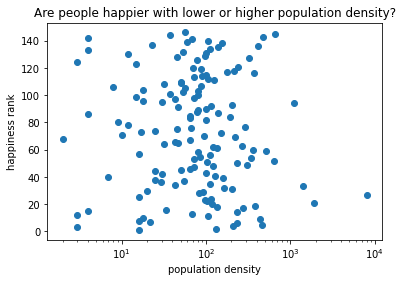

In [21]:
# scatter plot to see if the variables are connected, just for fun
joinedDF = popdensDF.merge(happiness_df, on='country')


plt.scatter(joinedDF['p_dense'], joinedDF['happiness_rank'])
plt.xlabel('population density')
plt.ylabel('happiness rank')
plt.title('Are people happier with lower or higher population density?')
plt.xscale('log')

## Answer: no